## Custom score functions

In this version of Isolation, the player whose turn it is when both pieces are on squares of the same color has an advantage. The reason is that whenever there is a square that both players can reach (which means that they are both on a square of the opposite color), this player moves first. If moving to this square is good, the player can not only reach a good square, but he can also prevent his opponent from reaching a good square. The following position illustrates this.

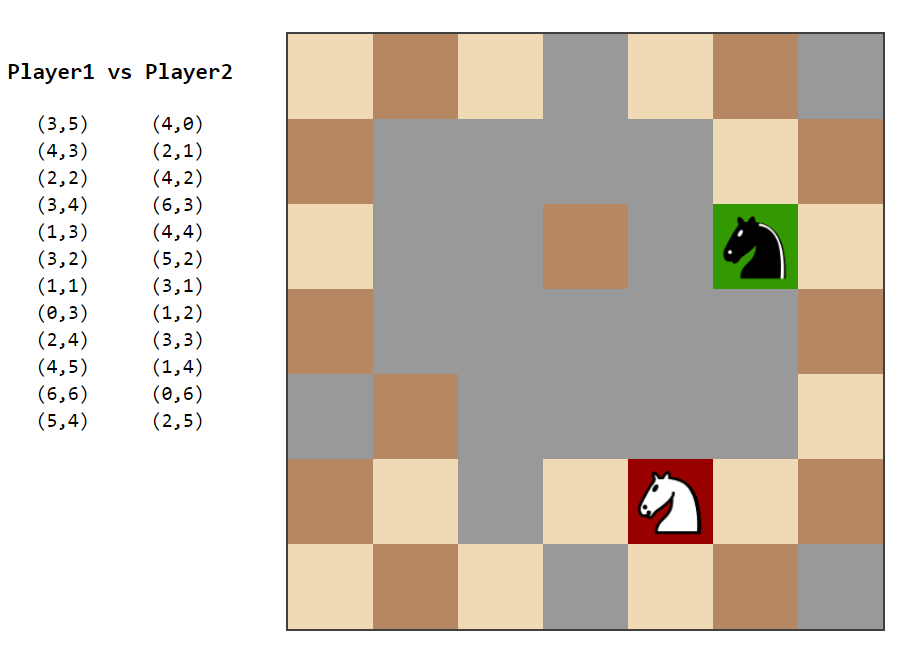

Here (4, 6) is a good square. From there a few more moves along the bottom of the board will be available. As it is White's turn, he can move to this square, thus preventing Black from moving there.

In the following we call the player who has this advantage the _attacker_, and we call his opponent the _defender_. In general, a position where both players compete for the same squares favors the attacker. If the possible moves for both players do not overlap, the attacker's advantage is neutralized. custom_score_2 makes use of this observation.

__custom_score_2:__ This heuristic increases the value from improved_score by 3 if there is a square which can be reached by both players in the next move. The value 3 was found by experimenting. This score function is about as good as improved_score.

__custom_score_3:__ The score functions from the lecture and custom_score_2 only look at the squares that each player can reach in the next move. This function looks at the squares that each player can reach in the next $k$ moves (for some $k \geq 2$). We write $s_k(p)$ for the number of squares that the player $p$ can reach in the next $k$ moves. Then custom_score_3 is calculated as

$$s_k(player) - s_k(opponent)$$

It turns out that 2 and 3 work best as values for $k$. In the implementation $k = 2$ is used. This score function takes more time than the functions from the lecture and custom_score_2. It performs worse than improved_score.

__custom_score:__ This score function combines the ideas from custom_score_2 and custom_score_3. We write $s_k(both)$ for the number of squares that can be reached by both players in the next $k$ moves. As the attacker wants to reach a position where both players compete for the same squares and the defender wants to avoid this, we define the score function as

$$s_k(player) - s_k(opponent) + c \cdot s_k(both)$$

if $player$ is the attacker and

$$s_k(player) - s_k(opponent) - c \cdot s_k(both)$$

if $player$ is the defender.

$c$ is a constant value. After experimenting with different values for $k$ and $c$ I chose $k = 2$ and $c = 0.5$.

Although custom_score takes more time than the score functions from the lecture, it performs slightly better.

## Tournament results

As a final test of the score functions, I used tournament.py to compare them. In order to have a variety of test agents, I added two more agents:

* AB_NR_Impr: In my implementation of the AlphaBeta algorithm the most promising branches are considered first. I.e. for the iteration with depth $n + 1$, the path that seemed best in the iteration with depth $n$ is evaluated first. Thus more branches are pruned. AB_NR_Impr is a simpler AlphaBeta agent that does _not_ reorder the branches (NR stands for "no reordering"). The score function used by this agent is improved_score. As expected, this player is slightly weaker than the version with reordering.

* MonteCarlo: During my search for a better algorithm I also tried implementing a Monte Carlo tree search. This player is about as strong as Minimax.

Here are the match results:




